In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('P4dataCleaned2.xlsx', index_col = 'Date')

In [3]:
# DF index is of type DatetimeIndex
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25305 entries, 2017-05-30 to 2019-01-06
Data columns (total 1 columns):
Item    25305 non-null object
dtypes: object(1)
memory usage: 395.4+ KB


In [4]:
df.head()

,Item
Date,
2017-05-30,ENGINE OIL
2017-05-31,ENGINE OIL
2017-05-31,POLISH
2017-05-31,CONSUMABLES
2017-05-31,COOLANT OIL


### Let us first analyze the demand for all spare parts together
* Later, we will consider demand forecasting for each of the top 20 spare parts

In [5]:
inventory = df.copy()

**Note 1:**  
It is observed that the daily parts demand from service centres too low for ML forecast modelling.  
Hence, it is decided to consider weekly demand.   
Weekly grouping will reduce the data into 84 observations as the data available is for 84 weeks.  


In [6]:
AllItemsWeeklyCount = inventory['Item'].resample('W').count()

In [13]:
AllItemsWeeklyCount.size

84

In [8]:
import matplotlib.pyplot as plt

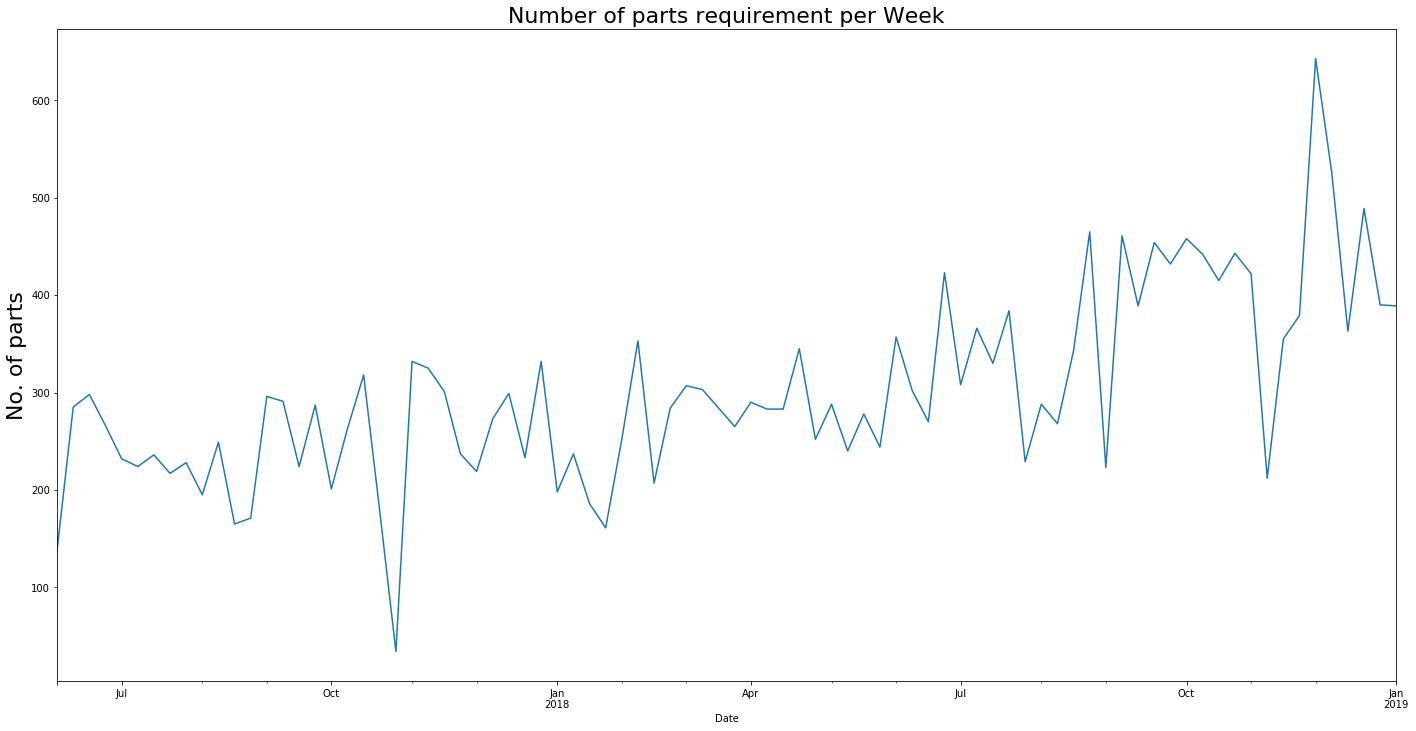

In [14]:
plt.rcParams['figure.figsize'] = (24,12)
AllItemsWeeklyCount.plot();
plt.title('Number of parts requirement per Week', fontdict={'fontsize':22})
plt.ylabel('No. of parts', fontdict={'fontsize':22});

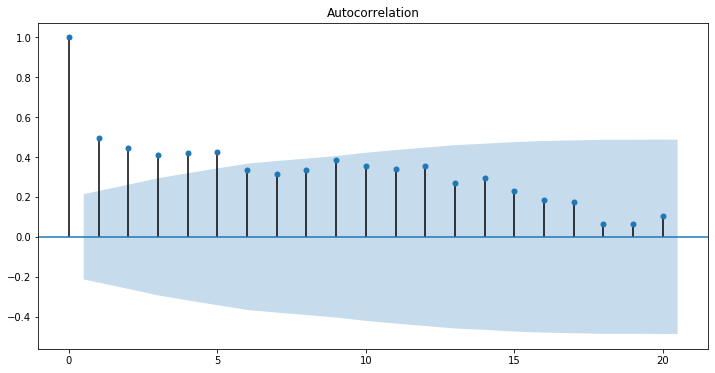

In [18]:
plt.rcParams['figure.figsize'] = (12,6)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(AllItemsWeeklyCount);

In [19]:
AllItemsWeeklyCount_diff=AllItemsWeeklyCount.diff(periods=1)
#Integraded orde of 1, denoted by d(for difference), one of the parameter of ARIMA model
AllItemsWeeklyCount_diff = AllItemsWeeklyCount_diff[1:]

#### Differencing the data makes it 'stationary' which is required by ARIMA for forecasting

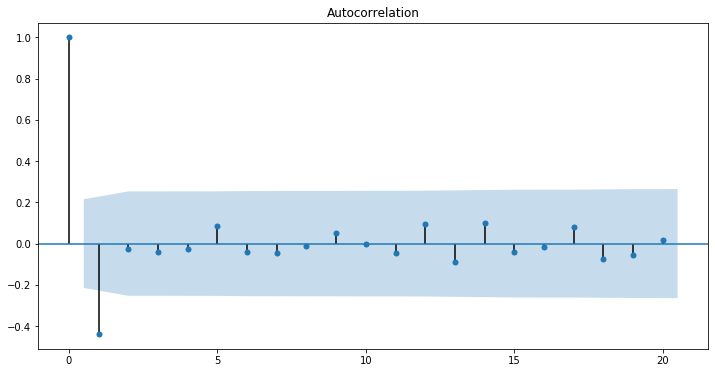

In [21]:
plot_acf(AllItemsWeeklyCount_diff);

In [23]:
X = AllItemsWeeklyCount.values

traindata = X[:70] #70 data as train
test_data = X[70:] #14 data as test
predictions = []

In [24]:
print('train data length : ', len(traindata))
print('test  data length : ', len(test_data))

train data length :  70
test  data length :  14


In [25]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(traindata, order=(3,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

784.8756429372268


In [26]:
predictions = model_arima_fit.forecast(steps=14)[0]
predictions

array([351.1797613 , 352.57056519, 355.54184689, 358.0530839 ,
       360.19257841, 362.32623122, 364.46510083, 366.60566604,
       368.74622444, 370.88674535, 373.0272587 , 375.16777236,
       377.30828624, 379.44880015])

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(test_data, predictions)

12100.475763980257

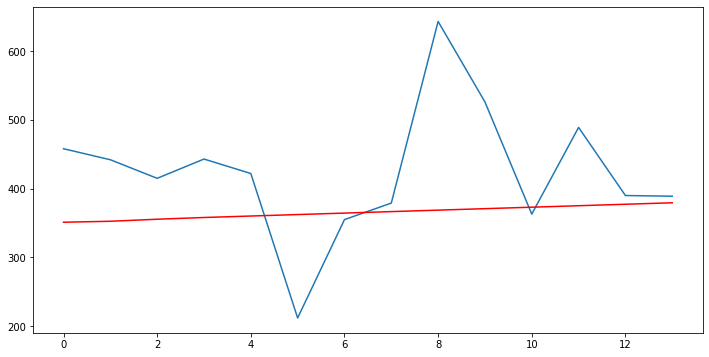

In [29]:
plt.plot(test_data)
plt.plot(predictions, color='red')

In [31]:
import itertools 
p=q=range(0,10)
d = range(2,6)
pdq = list(itertools.product(p,d,q))

In [35]:
import warnings
warnings.filterwarnings('ignore')
lowest_aic = 10000
for param in pdq:
    try:
        model_arima = ARIMA(traindata, order=param)
        model_arima_fit = model_arima.fit()
        if model_arima_fit.aic < lowest_aic:
            lowest_aic = model_arima_fit.aic
        print(param, model_arima_fit.aic, lowest_aic)
    except:
        continue

(0, 2, 0) 881.9332310474898 881.9332310474898
(0, 2, 1) 814.8863481680174 814.8863481680174
(1, 2, 0) 844.8496540716309 814.8863481680174
(1, 2, 2) 776.9793816484278 776.9793816484278
(2, 2, 0) 828.9600032819247 776.9793816484278
(2, 2, 2) 778.5876600536744 776.9793816484278
(2, 2, 5) 779.3085397401866 776.9793816484278
(2, 2, 6) 780.7327849415477 776.9793816484278
(3, 2, 0) 818.5866472989852 776.9793816484278
(3, 2, 1) 789.4120336534947 776.9793816484278
(3, 2, 6) 781.8178033466158 776.9793816484278
(3, 2, 7) 780.942916606986 776.9793816484278
(3, 2, 8) 784.8214635452282 776.9793816484278
(4, 2, 0) 810.678197540947 776.9793816484278
(4, 2, 1) 787.9351852958454 776.9793816484278
(4, 2, 4) 808.0555423701892 776.9793816484278
(4, 2, 8) 783.1766125449187 776.9793816484278
(5, 2, 0) 804.0312405680778 776.9793816484278
(5, 2, 1) 789.0879931085901 776.9793816484278
(5, 2, 2) 784.1899555101152 776.9793816484278
(5, 2, 3) 788.4142814554726 776.9793816484278
(5, 2, 5) 783.6797519036118 776.9793

In [40]:
model_arima = ARIMA(traindata, order=(9,2,4))
model_arima_fit = model_arima.fit()

predictions = model_arima_fit.forecast(steps=14)[0]
predictions

array([357.20434298, 350.48255411, 381.79527439, 421.76588572,
       326.94705575, 459.05266851, 381.72942208, 455.1706587 ,
       479.24368962, 399.62292858, 495.7194721 , 429.49517198,
       479.31300181, 456.76613868])

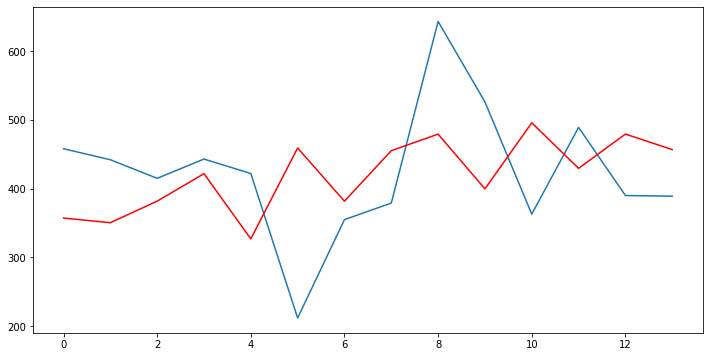

In [41]:
plt.plot(test_data)
plt.plot(predictions, color='red')

### Lets us create 9 models for top 9 items(spare parts)

In [42]:
inventory.head()

,Item
Date,
2017-05-30,ENGINE OIL
2017-05-31,ENGINE OIL
2017-05-31,POLISH
2017-05-31,CONSUMABLES
2017-05-31,COOLANT OIL


In [43]:
inventory.Item.value_counts()[0:9].index

Index(['ENGINE OIL', 'CHAIN LUBRICATION', 'AIR FILTER', '3M OIL',
       'CONSUMABLES', 'POLISH', 'DISC OIL', 'BRAKE SHOE', 'OIL FILTER'],
      dtype='object')

In [45]:
import re
itemGroups = []
dfGroupObj = inventory.groupby('Item')
for item in inventory.Item.value_counts()[0:9].index:
    modItem = item.replace(' ', '_')
    print(item, 'File Name : ', modItem)
    tempDf = dfGroupObj.get_group(item).resample('W').count()
    itemGroups.append(tempDf)
    tempDf.to_excel(modItem + '.xlsx')

ENGINE OIL File Name :  ENGINE_OIL
CHAIN LUBRICATION File Name :  CHAIN_LUBRICATION
AIR FILTER File Name :  AIR_FILTER
3M OIL File Name :  3M_OIL
CONSUMABLES File Name :  CONSUMABLES
POLISH File Name :  POLISH
DISC OIL File Name :  DISC_OIL
BRAKE SHOE File Name :  BRAKE_SHOE
OIL FILTER File Name :  OIL_FILTER


In [62]:
itemGroups[0].Item.values

array([28, 39, 45, 45, 39, 38, 40, 38, 38, 33, 40, 29, 29, 39, 45, 40, 55,
       32, 49, 50, 30,  5, 51, 54, 45, 41, 38, 47, 57, 45, 49, 37, 39, 36,
       25, 46, 56, 40, 51, 52, 51, 47, 45, 46, 46, 54, 52, 44, 44, 43, 47,
       46, 56, 51, 45, 58, 48, 60, 49, 50, 35, 44, 43, 49, 59, 29, 51, 51,
       51, 53, 58, 55, 56, 51, 57, 20, 53, 45, 68, 58, 43, 53, 56, 47],
      dtype=int64)

In [63]:
X = itemGroups[0].values

traindata = X[:70] #70 data as train
test_data = X[70:] #14 data as test
predictions = []

In [64]:
print('train data length : ', len(traindata))
print('test  data length : ', len(test_data))

train data length :  70
test  data length :  14


In [65]:
import itertools 
p=q=range(0,10)
d = range(2,6)
pdq = list(itertools.product(p,d,q))

In [66]:
import warnings
warnings.filterwarnings('ignore')
lowest_aic = 10000 #setting initial value to a large value
for param in pdq:
    try:
        model_arima = ARIMA(traindata, order=param)
        model_arima_fit = model_arima.fit()
        if model_arima_fit.aic < lowest_aic:
            lowest_aic = model_arima_fit.aic
        print(param, model_arima_fit.aic, lowest_aic)
    except:
        continue

(0, 2, 0) 598.1900512317409 598.1900512317409
(0, 2, 1) 536.0514309136602 536.0514309136602
(1, 2, 0) 572.5667935347603 536.0514309136602
(2, 2, 0) 557.7980838849335 536.0514309136602
(3, 2, 0) 547.1585055134326 536.0514309136602
(3, 2, 1) 519.8087001475163 519.8087001475163
(4, 2, 0) 541.7808698830243 519.8087001475163
(4, 2, 1) 519.540008039345 519.540008039345
(4, 2, 2) 523.8092384474827 519.540008039345
(5, 2, 0) 535.6334324575121 519.540008039345
(5, 2, 1) 520.1723848757608 519.540008039345
(5, 2, 4) 513.1027135874356 513.1027135874356
(6, 2, 0) 536.091316036742 513.1027135874356
(6, 2, 1) 522.1532270114423 513.1027135874356
(7, 2, 0) 537.0776614820488 513.1027135874356
(7, 2, 1) 522.5492564430074 513.1027135874356
(8, 2, 0) 535.8462183668271 513.1027135874356
(9, 2, 0) 536.3465602809067 513.1027135874356


In [67]:
model_arima = ARIMA(traindata, order=(5,2,4))
model_arima_fit = model_arima.fit()

predictions = model_arima_fit.forecast(steps=14)[0]
predictions

array([48.7214834 , 49.33457053, 51.47511883, 50.99420033, 50.15336926,
       51.02699714, 52.18653872, 52.00853679, 51.53856406, 52.19333664,
       53.11052687, 53.05211845, 52.75690229, 53.29762913])

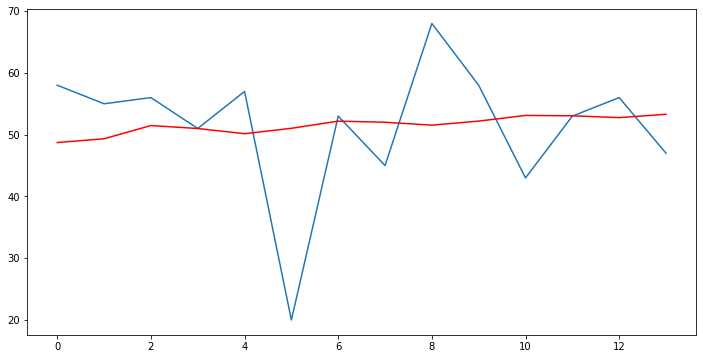

In [69]:
plt.plot(test_data)
plt.plot(predictions, color='red');